<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 13 **
** ┗ Store visit congestion prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉SESSION 1 -「Identify the characteristics by day of the week」
* 🥈SESSION 2 -「Menu Data Processing」
* 🥇Session 3 -「Forecast of drinking water personnel」


In [ ]:
# Restime restart after installing Hangul fonts
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,832 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126209 files and dire

In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/13_Store Visit Congestion Prediction')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/13_Store Visit Congestion Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🍲 (Store Manager)

``
A store manager is rotten by food inventory these days.Each time I predict drinking water, but some days
Some days are often coming to a lot of cases, so they are lost in terms of inventory management.
Using the menu information and the information data of the workers, we will predict drinking water and efficiently manage the inventory.

``


> ** Looking at the data **

* Headquarters worker status and meal menu data
* Data specification ⬇

| Date | Day of the day | Headquarters Headquarters | Headquarters vacation embroidery | Headquarters business business owner | Headquarters hours Outwardly approval number |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Number of people from the current headquarters | Breakfast Menu | Language menu | Dinner menu | Chinese food | Dinner |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter13_congestion.csv', encoding='cp949')
df.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Inventory management loss cost due to difficulty in forecasting drinking water
``

> ** Expected effect **

``
▶ Inventory management efficiency through prediction of drinking water personnel, reduced loss costs
``

> ** Solution **

``
▶ Forecast of drinking water for predicting drinking water and preparing food
▶ Session 1 🥉
-DATA pretreatment and drinking water personnel data exploration
▶ Session 2 🥈
-Text (menu) Data processing method and exploration
▶ Session 3 🥇
-Exuality of drinking water using ML algorithms
``

> ** Performance measurement **

``
▶ Comparison before/after/after loss costs
``

> ** Public application **

``
▶ Data Mart preparation for input to Model (※)
▶ Expected to predict the number of drinking water using MODEL
▶ Inventory management according to the number of drinking water
``

> ** Main code preview **

``
▶ Session 1 → TO_DATETIME, PD.DATAFRAME (df_dow, index = [])
▶ Session 2 → Replace, Split, Lstrip (), sort_values
▶ Session 3 → Labelencoder (), mean_absolute_error, r2_score
``


## ** 🥉Session 1 **
** ┗ Identify the characteristics of each week **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ 1205 row, 12 cola
print('df', df.shape)

df (1205, 12)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64


### · Data search
---


In [ ]:
df.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [ ]:
import datetime
df['일자'] = pd.to_datetime(df['일자'])

In [ ]:
# ▶ Data from February 1, 2016 to January 26, 2021
df['일자'].min(), df['일자'].max()

(Timestamp('2016-02-01 00:00:00'), Timestamp('2021-01-26 00:00:00'))

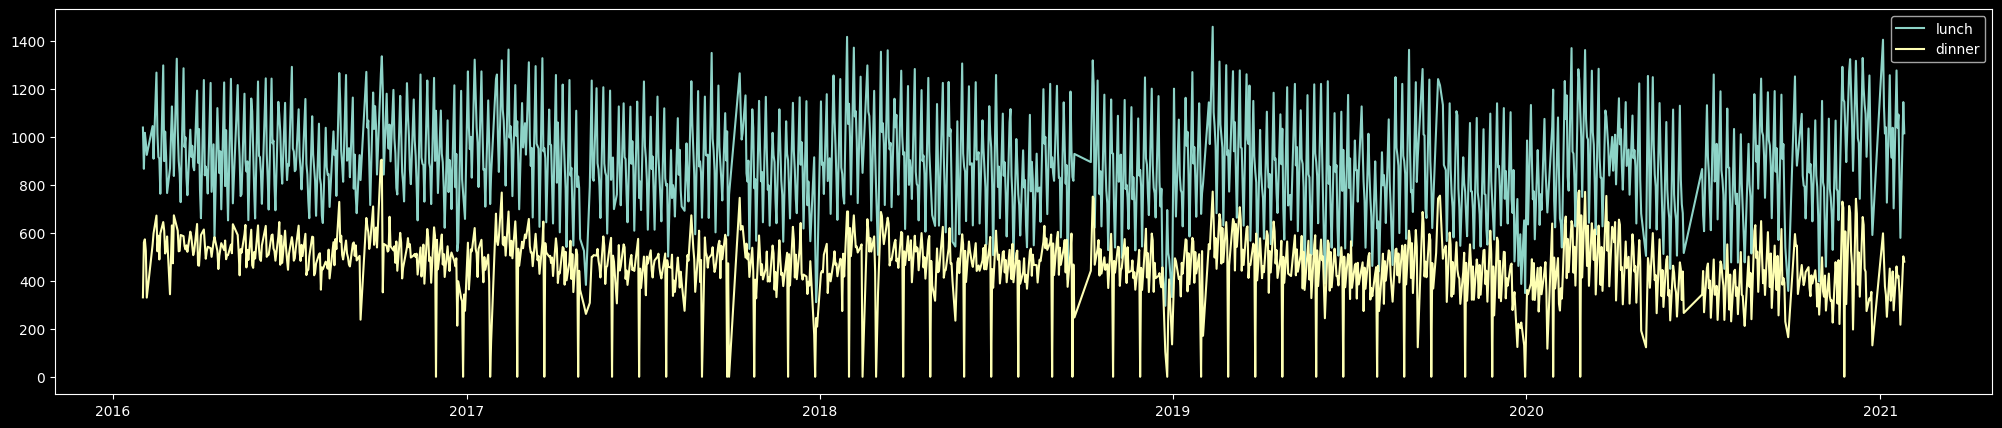

In [ ]:
# ▶ Drinking water by date
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['일자'], df['중식계'], label='lunch');
plt.plot(df['일자'], df['석식계'], label='dinner');
plt.gcf().set_size_inches(25, 5);
plt.legend();

In [ ]:
df_dow = pd.DataFrame(df.groupby('요일')[['중식계', '석식계']].mean())
df_dow

,중식계,석식계
요일,,
금,653.609959,404.979253
목,823.991803,480.401639
수,905.213389,363.615063
월,1144.331950,538.933610
화,925.620833,520.129167


In [ ]:
# ▶ Sort the order of Index in the order of the week to express in the graph
df_dow = pd.DataFrame(df_dow, index=['월', '화', '수', '목', '금'])
df_dow

,중식계,석식계
월,1144.331950,538.933610
화,925.620833,520.129167
수,905.213389,363.615063
목,823.991803,480.401639
금,653.609959,404.979253


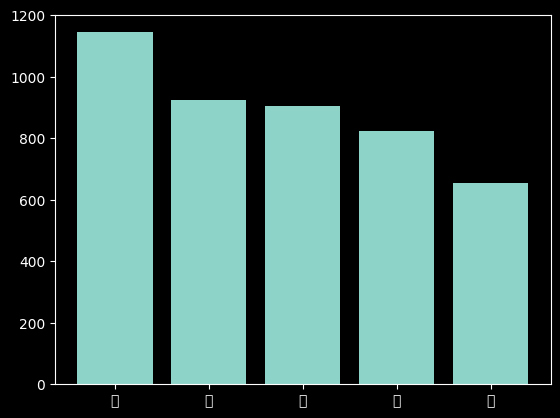

In [ ]:
# ▶ Average drinking water for each week (lunch)

fig,ax = plt.subplots()
plt.bar(df_dow.index, df_dow['중식계']);
plt.rc('font', family='NanumBarunGothic')

#xlabels = ["Mon", "Tue", "Wed", "Thr", "Fri"]
#ax.set_xticklabels(xlabels);

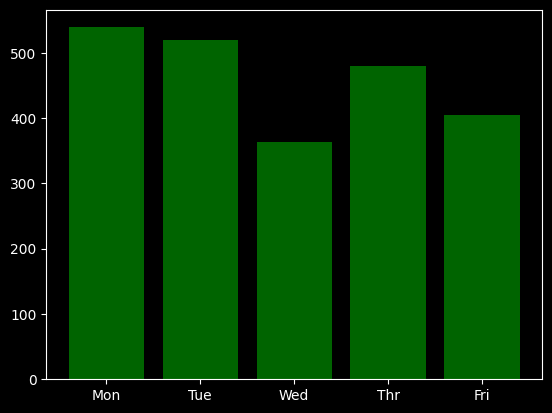

In [ ]:
# ▶ Average drinking water for each week (dinner)

fig,ax = plt.subplots()
plt.bar(df_dow.index, df_dow['석식계'],color='darkgreen');

xlabels = ["Mon", "Tue", "Wed", "Thr", "Fri"]
ax.set_xticklabels(xlabels);

In [ ]:
df.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [ ]:
df['month'] = df['일자'].dt.month
df.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,month
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2


In [ ]:
df_month = df.groupby('month')[['중식계', '석식계']].mean()
df_month['index'] = df_month.index.astype(str)
df_month.head(3)

,중식계,석식계,index
month,,,
1,934.247525,424.564356,1
2,989.623656,514.860215,2
3,953.607477,530.700935,3


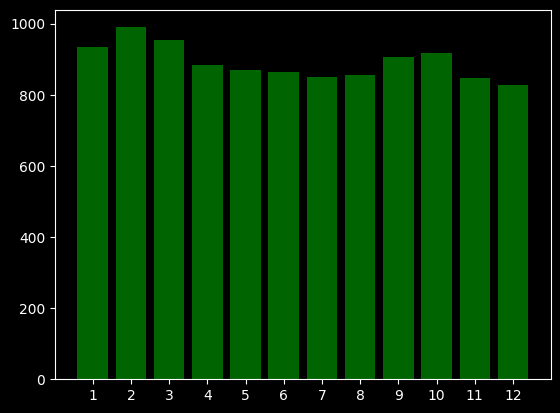

In [ ]:
# ▶ Average drinking water for each month (lunch)
fig,ax = plt.subplots()
plt.bar(df_month['index'] , df_month['중식계'],color='darkgreen');

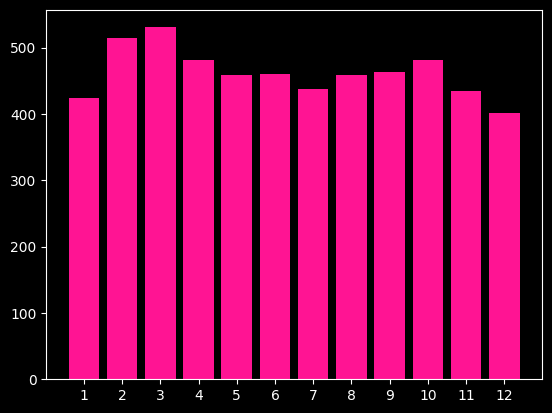

In [ ]:
# ▶ Average drinking water for each month (dinner)
fig,ax = plt.subplots()
plt.bar(df_month['index'] , df_month['석식계'],color='deeppink');

## ** 🥈Session 2 **
** ┗ Menu data processing **
---
* Data pretreatment to use the menu Text data


### · Text Data Split
---


In [ ]:
# ▶ Menu data is divided into blanks ('')
df['조식메뉴'][0]

'모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐어채무침  포기김치 (배추,고추가루:국내산) '

In [ ]:
# ▶ The gap is also divided into 2 spaces and 1 space
print(df['조식메뉴'][0].replace(' ', '*' ) )

모닝롤/찐빵**우유/두유/주스*계란후라이**호두죽/쌀밥*(쌀:국내산)*된장찌개**쥐어채무침**포기김치*(배추,고추가루:국내산)*


In [ ]:
# ▶ Change blank 2 to blank 1
df['조식메뉴']= df['조식메뉴'].str.replace('  ', ' ')
df['중식메뉴']= df['중식메뉴'].str.replace('  ', ' ')
df['석식메뉴']= df['석식메뉴'].str.replace('  ', ' ')

In [ ]:
df['조식메뉴'][0]

'모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐어채무침 포기김치 (배추,고추가루:국내산) '

In [ ]:
 # ▶ Split data with spaces
df['조식메뉴'].str.split(' ')

,조식메뉴
0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, (쌀:국내산), 된장찌..."
1,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, (쌀:국내산), 호..."
2,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, (쌀:국내산), ..."
3,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, (쌀,닭:국내산),..."
4,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, (쌀:국내산), 재첩..."
...,...
1200,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀..."
1201,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해..."
1202,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살..."
1203,"[모닝롤/호박고구마오븐구이, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 감자..."


In [ ]:
 # ▶ Import only the first list of the data divided into spaces and use it as a main menu
df['조식메뉴'].str.split(' ').str[0]

,조식메뉴
0,모닝롤/찐빵
1,모닝롤/단호박샌드
2,모닝롤/베이글
3,모닝롤/토마토샌드
4,모닝롤/와플
...,...
1200,모닝롤/페퍼로니피자
1201,모닝롤/생크림단팥빵
1202,모닝롤/BLT샌드위치
1203,모닝롤/호박고구마오븐구이


In [ ]:
text='    쌀밥/잡곡밥 (쌀:국내산) 꽃게탕'
text.lstrip()

'쌀밥/잡곡밥 (쌀:국내산) 꽃게탕'

In [ ]:
 # ▶ Remove the left blank (※ Actual data application)
df['조식메뉴'] = df['조식메뉴'].str.lstrip()
df['중식메뉴'] = df['중식메뉴'].str.lstrip()
df['석식메뉴'] = df['석식메뉴'].str.lstrip()

In [ ]:
 # ▶ Split the data with a space and get the first object (※ Actual data application)
df['조식메뉴_main'] = df['조식메뉴'].str.split(' ').str[0]
df['중식메뉴_main'] = df['중식메뉴'].str.split(' ').str[0]
df['석식메뉴_main'] = df['석식메뉴'].str.split(' ').str[0]

In [ ]:
df.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,month,조식메뉴_main,중식메뉴_main,석식메뉴_main
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐어채무...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 청...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 포기김...",1039.0,331.0,2,모닝롤/찐빵,쌀밥/잡곡밥,쌀밥/잡곡밥
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무침...",867.0,560.0,2,모닝롤/단호박샌드,쌀밥/잡곡밥,콩나물밥*양념장
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국 느...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 견...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기전...",1017.0,573.0,2,모닝롤/베이글,카레덮밥,쌀밥/잡곡밥


In [ ]:
 # ▶ Main menu grasp the number of branches
df['조식메뉴_main'].value_counts().head(10)

,count
조식메뉴_main,
모닝롤/프렌치토스트,52
모닝롤/마늘빵,46
모닝롤/크로와상,45
모닝롤/찐빵,44
모닝롤/에그샌드,43
모닝롤/참치샌드,42
모닝롤/야채샌드,41
모닝롤/와플,41
모닝롤/단팥빵,40


In [ ]:
 # ▶ Main menu grasp the number of branches
df['중식메뉴_main'].value_counts().head(10)

,count
중식메뉴_main,
쌀밥/잡곡밥,879
쌀밥/흑미밥/찰현미밥,74
콩나물밥,23
카레덮밥,18
나물비빔밥,15
곤드레밥*강된장,12
단호박영양밥,10
쌀밥/수수밥/찰현미밥,10
카레라이스,8


In [ ]:
 # ▶ Main menu grasp the number of branches
df['석식메뉴_main'].value_counts().head(10)

,count
석식메뉴_main,
쌀밥/잡곡밥,657
흑미밥,92
*,28
유부초밥,25
김밥,25
오므라이스,22
멸치주먹밥,21
참치주먹밥,18
충무김밥,16


### · Menu Data EDA
---


In [ ]:
df['중식계'].mean()

np.float64(890.3344398340249)

In [ ]:
 # ▶ Number of drinking water according to Main Menu
 df_lunch = pd.DataFrame(df.groupby('중식메뉴_main')['중식계'].mean())
 df_lunch.sort_values(by=['중식계'],ascending=True).head(10)

,중식계
중식메뉴_main,
파인애플볶음밥,387.0
베이컨김치볶음밥,505.0
돈육버섯고추장덮밥,516.0
야채볶음밥*짜장소스,535.0
김치볶음밥,543.0
쌀밥/병아리콩/찰현미밥,570.0
오므라이스,572.0
전주비빔밥*약고추장,579.0
쌀밥/옛날돈까스,586.0


In [ ]:
df['석식계'].mean()

np.float64(461.77261410788384)

In [ ]:
 # ▶ Number of drinking water according to Main Menu
 # ▶ There is also a data without a dinner menu
 df_dinner = pd.DataFrame(df.groupby('석식메뉴_main')[['석식계']].mean())
 df_dinner.sort_values(by=['석식계'],ascending=False).head(10)

,석식계
석식메뉴_main,
마파두부,685.0
김밥/맑은국,645.0
마늘베이컨볶음밥,645.0
참치덮밥,640.0
고추잡채덮밥,633.0
투움바스파게티,629.0
짜장면/작은밥,619.5
버섯영양밥*우렁양념장,614.0
토마토스파게티(작은밥),607.0


In [ ]:
 # ▶ There is also a data without dinner menu (*, self -development day,*self -development day*, family day)
df[df['석식계']== 0]['석식메뉴'].value_counts()

,count
석식메뉴,
*,21
,4
자기계발의날,3
자기개발의날,3
* 자기계발의날 *,2
* 자기개발의날 *,2
쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 고추잡채*꽃빵 계란찜 오이무침 포기김치 (김치:국내산),1
쌀밥/잡곡밥 (쌀:국내산) 된장찌개 미니함박조림 계란말이 비름나물 포기김치 (김치:국내산),1
가정의날,1


## ** 🥇Session 3 **
** ┗ Forecast of drinking water personnel **
---


In [ ]:
 # ▶ Excluded when predicting dietary diet
len(df[df['석식계']==0])

43

### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
# ▶ Numeric, Categorical Value Sharing
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['요일', '조식메뉴', '중식메뉴', '석식메뉴', '조식메뉴_main', '중식메뉴_main', '석식메뉴_main']
numeric_list : ['일자', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '중식계', '석식계', 'month']


In [ ]:
df[categoical_list ]

,요일,조식메뉴,중식메뉴,석식메뉴,조식메뉴_main,중식메뉴_main,석식메뉴_main
0,월,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐어채무...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 청...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 포기김...",모닝롤/찐빵,쌀밥/잡곡밥,쌀밥/잡곡밥
1,화,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무침...",모닝롤/단호박샌드,쌀밥/잡곡밥,콩나물밥*양념장
2,수,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국 느...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 견...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기전...",모닝롤/베이글,카레덮밥,쌀밥/잡곡밥
3,목,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국 멸...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포기김치 ...",모닝롤/토마토샌드,쌀밥/잡곡밥,미니김밥*겨자장
4,금,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방풍나물...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",모닝롤/와플,쌀밥/잡곡밥,쌀밥/잡곡밥
...,...,...,...,...,...,...,...
1200,수,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,모닝롤/페퍼로니피자,쌀밥/흑미밥/찰현미밥,김치볶음밥
1201,목,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,모닝롤/생크림단팥빵,쌀밥/수수밥/찰현미밥,흑미밥
1202,금,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,모닝롤/BLT샌드위치,전주비빔밥*약고추장,흑미밥
1203,월,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,모닝롤/호박고구마오븐구이,쌀밥/흑미밥/찰현미밥,흑미밥


In [ ]:
df.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', 'month',
       '조식메뉴_main', '중식메뉴_main', '석식메뉴_main'],
      dtype='object')

In [ ]:
# ▶ Forecast of Chinese food
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df.drop(['일자', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '석식메뉴_main'], axis=1)
Y=df['중식계']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(843, 9)
(843,)
(362, 9)
(362,)


In [ ]:
print(categoical_list)

['요일', '조식메뉴', '중식메뉴', '석식메뉴', '조식메뉴_main', '중식메뉴_main', '석식메뉴_main']


In [ ]:
# ▶ Data that do not require formation is eliminated from the category data list
categoical_list.remove('조식메뉴')
categoical_list.remove('중식메뉴')
categoical_list.remove('석식메뉴')
categoical_list.remove('석식메뉴_main')
print(categoical_list)

['요일', '조식메뉴_main', '중식메뉴_main']


In [ ]:
x_train.head(3)

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,month,조식메뉴_main,중식메뉴_main
84,수,2637,58,240,0,0.0,6,모닝롤/바나나샌드,쌀밥/잡곡밥
40,금,2643,103,254,47,0.0,4,모닝롤/야채샌드,쌀밥/잡곡밥
751,수,2836,56,238,0,0.0,3,모닝롤/소보루빵,콩나물밥


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

요일
조식메뉴_main
중식메뉴_main


In [ ]:
x_test[categoical_list].head(5)

,요일,조식메뉴_main,중식메뉴_main
572,1,20,51
1122,1,84,56
44,1,116,51
1038,3,82,51
157,0,118,51


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
# ▶ Learning
rfr = RandomForestRegressor(n_estimators=150, max_depth=4)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=150)

In [ ]:
# ▶ Prediction
# ▶ Forecasts are predicted and evaluated for both data and test data used for learning (※ ※ determination)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  75.68572243773728
r2_score(r2):  0.7846356557710084

mae_test(mae):  78.3181947127753
r2_score(r2):  0.7573091892920734


In [ ]:
# ▶ Comparison of predictive value and actual value
result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result.sort_values(by=['diff'], ascending = False)

,Real Values,Predicted Values,diff
592,1258.0,874.026982,383.973018
222,1192.0,852.403001,339.596999
1039,1254.0,923.511821,330.488179
793,1221.0,905.403770,315.596230
1171,1188.0,904.628659,283.371341
...,...,...,...
220,524.0,761.287530,-237.287530
963,945.0,1182.702321,-237.702321
707,517.0,757.710535,-240.710535
470,394.0,676.969905,-282.969905


<Axes: xlabel='diff', ylabel='Density'>

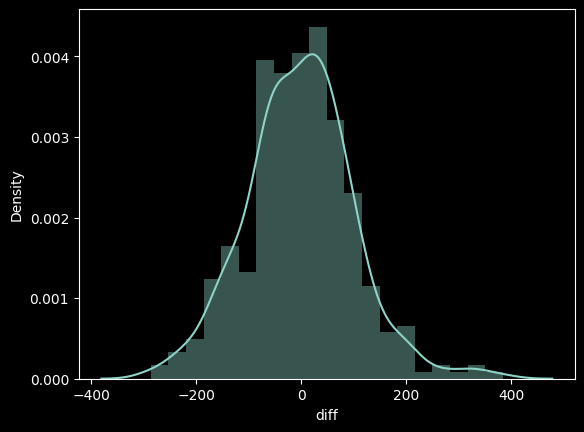

In [ ]:
sns.distplot(result['diff'])

In [ ]:
# Participation analysis of more than 200 more
len(result[abs(result['diff']) > 200])/len(result)

0.055248618784530384

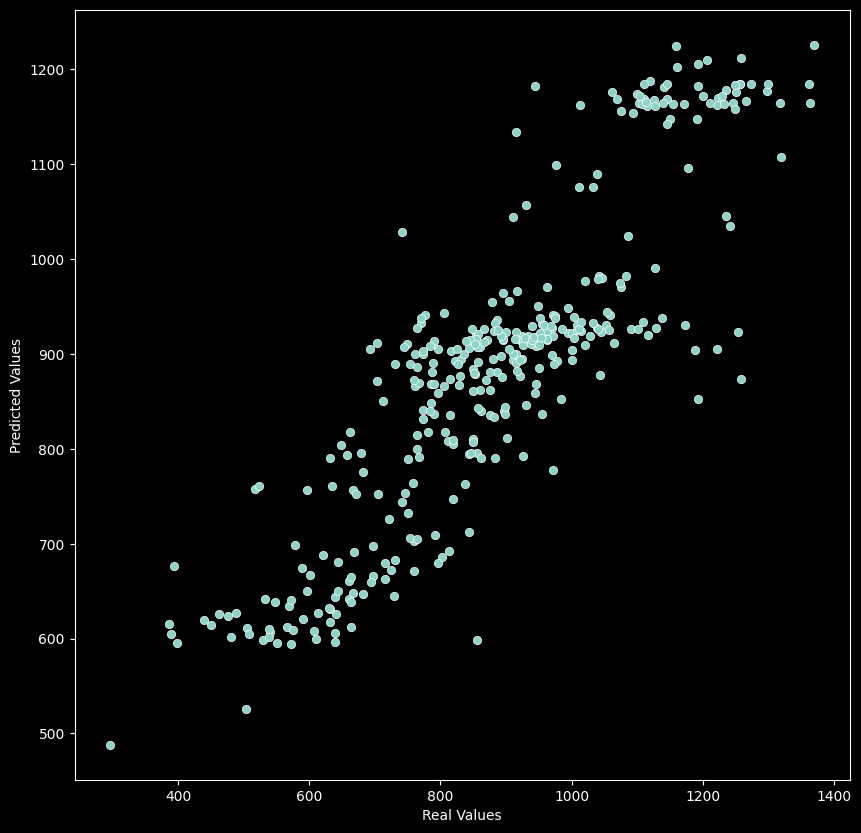

In [ ]:
# ▶ Test set is properly fitting
sns.scatterplot(x='Real Values', y='Predicted Values', data=result)
plt.gcf().set_size_inches(10 ,10)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


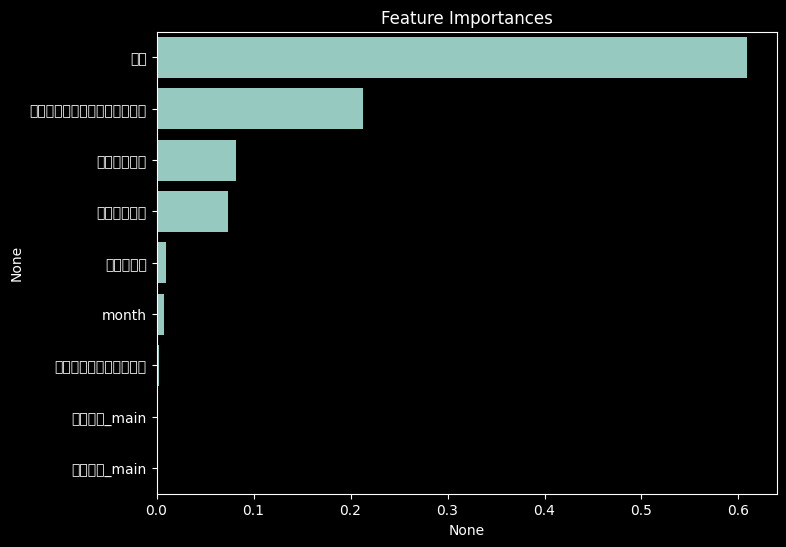

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ▶ Essential for Korean output
plt.rc('font', family='NanumBarunGothic')

plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
# ▶ It is common sense to affect lunch on the day of the week, and it is interesting to be a Chinese drinking water forecasting situation.
# ▶ Breakfast Menu _ Search for drinking water according tomain
df.groupby('조식메뉴_main')['중식계'].mean().sort_values(ascending=False).head(10)

,중식계
조식메뉴_main,
모닝롤/고구마오븐구이,1329.000000
모닝롤/(New)오리훈제샌드위치,1324.000000
모카카스테라/베이글,1298.000000
모닝롤/롤케이크,1286.000000
모닝롤/증편,1257.000000
모닝롤/소보로빵,1256.000000
모닝롤/생크림와플,1254.000000
모닝롤/바나나팬케익,1248.666667
모닝롤/후르츠팬케익,1242.333333


In [ ]:
# ▶ There seems to be no special difference
df.groupby('조식메뉴_main')['중식계'].mean().sort_values(ascending=False).tail(10)

,중식계
조식메뉴_main,
모닝롤/대만식연유샌드위치,594.0
모닝롤/블루베리사과샌드,591.0
모닝롤/케익,573.0
모닝롤/미니케익,565.0
모닝롤/모닝샌드,527.0
모닝롤/팥호빵,520.0
모닝롤/계란빵,477.0
모닝롤/마약토스트,476.0
모닝롤/스콘,450.0


### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfr)

# Model READ
rfr_from_pickle = pickle.loads(saved_model)